In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


<h3>Dataset Source:</h3>
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [26]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Note**: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    class_weight='balanced', 
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

# 🔹 1. Predict probabilities and labels
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1 (fraud)

# 🔹 2. Evaluate metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962


=== Confusion Matrix ===
[[56861     3]
 [   25    73]]

ROC-AUC Score: 0.952908497036969


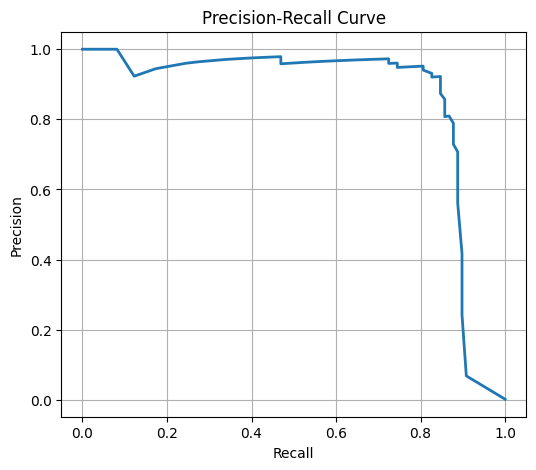

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, linewidth=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


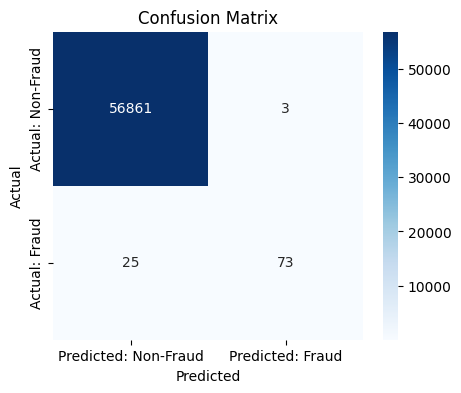

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Non-Fraud', 'Predicted: Fraud'],
            yticklabels=['Actual: Non-Fraud', 'Actual: Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [78]:
cd = df.iloc[541]
fraud_case2 = pd.DataFrame(cd)
# fraud_case2=fraud_case2.drop('Class',axis=0)
print(fraud_case2)

               541
Time    406.000000
V1       -2.312227
V2        1.951992
V3       -1.609851
V4        3.997906
V5       -0.522188
V6       -1.426545
V7       -2.537387
V8        1.391657
V9       -2.770089
V10      -2.772272
V11       3.202033
V12      -2.899907
V13      -0.595222
V14      -4.289254
V15       0.389724
V16      -1.140747
V17      -2.830056
V18      -0.016822
V19       0.416956
V20       0.126911
V21       0.517232
V22      -0.035049
V23      -0.465211
V24       0.320198
V25       0.044519
V26       0.177840
V27       0.261145
V28      -0.143276
Amount    0.000000
Class     1.000000


In [58]:
import pandas as pd

# Feature values of the transaction (remove 'Class' column)
fraud_case = pd.DataFrame([{
'Time':    407.000000,
'V1':       -0.918109,
'V2':        0.798542,
'V3':        1.753494,
'V4':       -0.576985,
'V5':       -0.554780,
'V6':        0.119542,
'V7':        1.096153,
'V8':      -0.114591,
'V9':       -0.213291,
'V10':      -0.742607,
'V11':      -0.138750,
'V12':       0.599899,
'V13':       1.208920,
'V14':      -0.381500,
'V15':       0.716385,
'V16':       0.472987,
'V17':      -0.684816,
'V18':      -0.649252,
'V19':      -1.378951,
'V20':      -0.205695,
'V21':       0.050748,
'V22':       0.201314,
'V23':       0.023568,
'V24':       0.107428,
'V25':      -0.464466,
'V26':       0.004938,
'V27':      -0.068013,
'V28':       0.093834,
'Amount':  146.250000
}])

print(fraud_case)


    Time        V1        V2        V3        V4       V5        V6        V7  \
0  407.0 -0.918109  0.798542  1.753494 -0.576985 -0.55478  0.119542  1.096153   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0 -0.114591 -0.213291  ... -0.205695  0.050748  0.201314  0.023568  0.107428   

        V25       V26       V27       V28  Amount  
0 -0.464466  0.004938 -0.068013  0.093834  146.25  

[1 rows x 30 columns]


In [59]:
pred_class = model.predict(fraud_case)[0]
pred_prob = model.predict_proba(fraud_case)[0][1]
print(f"Predicted class: {pred_class}")
print(f"Probability of being fraud: {pred_prob:.4f}")

threshold = 0.4  # lower threshold to catch more frauds
pred_class_thresh = int(pred_prob >= threshold)

if pred_class_thresh == 1:
    print(f"⚠️ This transaction is predicted as FRAUD (threshold={threshold})")
else:
    print(f"✅ This transaction is predicted as NON-FRAUD (threshold={threshold})")


Predicted class: 0
Probability of being fraud: 0.0000
✅ This transaction is predicted as NON-FRAUD (threshold=0.4)


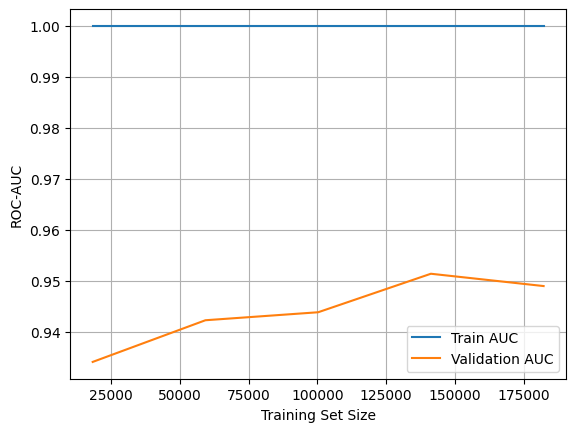

In [60]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1, 
    train_sizes=np.linspace(0.1,1.0,5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train AUC")
plt.plot(train_sizes, test_mean, label="Validation AUC")
plt.xlabel("Training Set Size")
plt.ylabel("ROC-AUC")
plt.legend()
plt.grid()
plt.show()


In [61]:
# Predict on training set
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:,1]

from sklearn.metrics import classification_report, roc_auc_score

print("=== Training Classification Report ===")
print(classification_report(y_train, y_train_pred, digits=4))
print("Training ROC-AUC:", roc_auc_score(y_train, y_train_proba))


=== Training Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    227451
           1     1.0000    1.0000    1.0000       394

    accuracy                         1.0000    227845
   macro avg     1.0000    1.0000    1.0000    227845
weighted avg     1.0000    1.0000    1.0000    227845

Training ROC-AUC: 1.0


In [62]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,           # limit depth
    min_samples_leaf=10,     # require at least 5 samples in leaf
    class_weight='balanced',
    random_state=42
)


In [66]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_estimators=200, random_state=42)

In [67]:
# Predict labels
y_test_pred = model.predict(X_test)

# Predict probabilities for threshold tuning
y_test_proba = model.predict_proba(X_test)[:, 1]


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred, digits=4))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

print("\nROC-AUC Score:", roc_auc_score(y_test, y_test_proba))


=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7593    0.8367    0.7961        98

    accuracy                         0.9993     56962
   macro avg     0.8795    0.9181    0.8979     56962
weighted avg     0.9993    0.9993    0.9993     56962


=== Confusion Matrix ===
[[56838    26]
 [   16    82]]

ROC-AUC Score: 0.9794716071572129


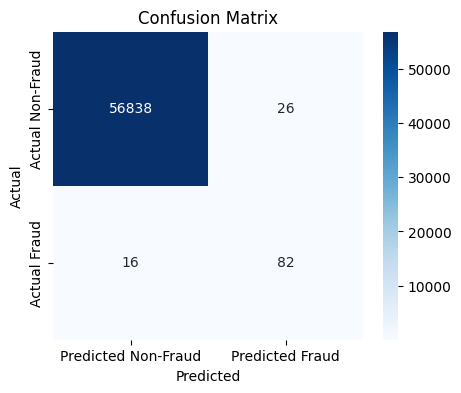

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


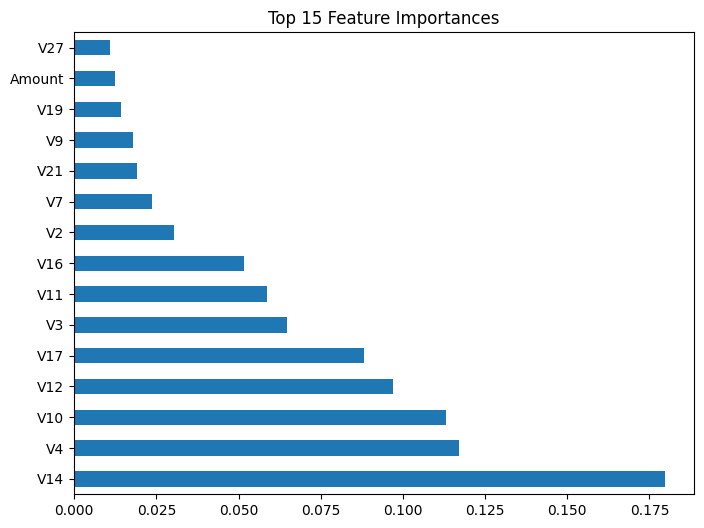

In [70]:
import pandas as pd

feat_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(15).plot(kind='barh', figsize=(8,6), title="Top 15 Feature Importances")
plt.show()


In [71]:
threshold = 0.4
y_test_pred_thresh = (y_test_proba >= threshold).astype(int)

print("\n=== Classification Report (Threshold = 0.4) ===")
print(classification_report(y_test, y_test_pred_thresh, digits=4))



=== Classification Report (Threshold = 0.4) ===
              precision    recall  f1-score   support

           0     0.9998    0.9992    0.9995     56864
           1     0.6641    0.8673    0.7522        98

    accuracy                         0.9990     56962
   macro avg     0.8319    0.9333    0.8759     56962
weighted avg     0.9992    0.9990    0.9991     56962



In [72]:
import pickle

# Save the model to a file
with open('fraud_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as 'fraud_model.pkl'")


✅ Model saved as 'fraud_model.pkl'
